In [9]:
import pickle

with open("model_ep_test.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

In [10]:
c = []
for i in range(len(b)):
    c.append(b[i].replace("$", ""))

In [36]:
# import matplotlib.pyplot as plt
# matplotlib.pyplot.plot(x,c,"bx")
# matplotlib.pyplot.show()

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

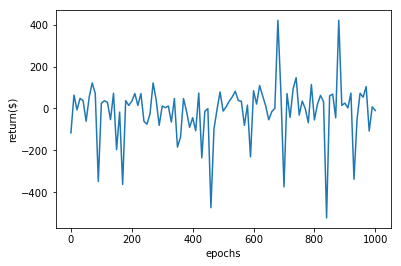

In [13]:
plt.plot(x, np.array(c))
plt.xlabel('epochs')
plt.ylabel('return($)')
plt.show()

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('data/^GSPC_2011.csv')

In [23]:
dtar = np.array(data['Adj Close'][0:25].tolist())

In [24]:
dtar

array([1271.869995, 1270.199951, 1276.560059, 1273.849976, 1271.5     ,
       1269.75    , 1274.47998 , 1285.959961, 1283.76001 , 1293.23999 ,
       1295.02002 , 1281.920044, 1280.26001 , 1283.349976, 1290.839966,
       1291.180054, 1296.630005, 1299.540039, 1276.339966, 1286.119995,
       1307.589966, 1304.030029, 1307.099976, 1310.869995, 1319.050049])

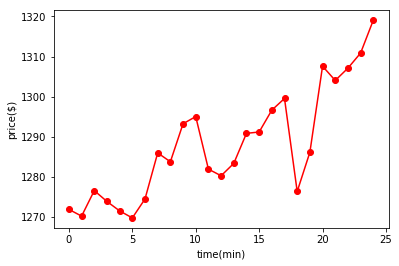

In [29]:
plt.plot(dtar, marker='o', markersize=6, color="red")
plt.xlabel('time(min)')
plt.ylabel('price($)')
plt.show()

In [31]:
res = []
for i in range(20):
    res.append(dtar[i+1] - dtar[i])

In [33]:
np.array(res)

array([ -1.670044,   6.360108,  -2.710083,  -2.349976,  -1.75    ,
         4.72998 ,  11.479981,  -2.199951,   9.47998 ,   1.78003 ,
       -13.099976,  -1.660034,   3.089966,   7.48999 ,   0.340088,
         5.449951,   2.910034, -23.200073,   9.780029,  21.469971])

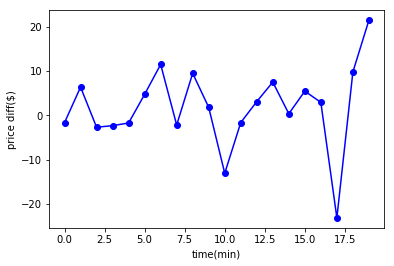

In [46]:
plt.plot(np.array(res), marker='o', markersize=6, color="blue")
plt.xlabel('time(min)')
plt.ylabel('price diff($)')
plt.show()

In [35]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [39]:
sigres = []
for i in range(len(res)):
    sigres.append(sigmoid(res[i]))

In [41]:
np.array(sigres)

array([1.58418313e-01, 9.98273805e-01, 6.23809966e-02, 8.70676801e-02,
       1.48047198e-01, 9.91250580e-01, 9.99989665e-01, 9.97548894e-02,
       9.99923640e-01, 8.55700570e-01, 2.04527553e-06, 1.59757433e-01,
       9.56476950e-01, 9.99441663e-01, 5.84211899e-01, 9.95721866e-01,
       9.48340230e-01, 8.40110314e-11, 9.99943433e-01, 1.00000000e+00])

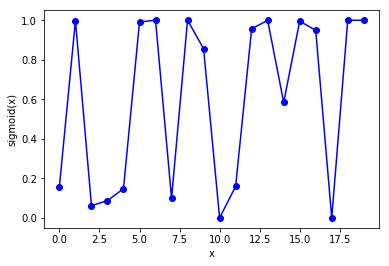

In [44]:
plt.plot(np.array(sigres), marker='o', markersize=6, color="blue")
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

In [24]:
c

['-116.61',
 '63.79',
 '-6.57',
 '48.28',
 '37.33',
 '-61.24',
 '53.86',
 '121.83',
 '71.53',
 '-348.42',
 '24.69',
 '36.81',
 '29.37',
 '-53.40',
 '72.74',
 '-196.89',
 '-17.31',
 '-362.72',
 '37.14',
 '14.49',
 '34.16',
 '71.14',
 '14.53',
 '70.82',
 '-61.44',
 '-75.06',
 '-24.63',
 '121.83',
 '42.27',
 '-80.62',
 '12.02',
 '3.50',
 '11.95',
 '-64.90',
 '47.33',
 '-184.45',
 '-138.10',
 '47.33',
 '-14.76',
 '-89.95',
 '-44.17',
 '-106.54',
 '73.49',
 '-235.72',
 '-13.21',
 '-1.12',
 '-473.65',
 '-98.33',
 '-5.43',
 '78.62',
 '-12.58',
 '7.68',
 '34.50',
 '54.63',
 '82.39',
 '37.42',
 '33.98',
 '-80.56',
 '15.99',
 '-231.28',
 '84.42',
 '20.82',
 '109.61',
 '59.86',
 '12.31',
 '-53.96',
 '-15.19',
 '0.32',
 '421.13',
 '73.49',
 '-374.47',
 '71.14',
 '-42.87',
 '93.65',
 '147.00',
 '-31.78',
 '35.04',
 '-0.92',
 '-68.02',
 '114.42',
 '-54.74',
 '19.67',
 '62.42',
 '32.78',
 '-522.63',
 '60.03',
 '68.39',
 '-44.74',
 '421.13',
 '14.52',
 '25.49',
 '2.80',
 '73.49',
 '-337.95',
 '-53.12'

In [10]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam

import numpy as np
import random
from collections import deque

/home/smilewater/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
def _model(self):
    model = Sequential()
    model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
    model.add(Dense(units=32, activation="relu"))
    model.add(Dense(units=8, activation="relu"))
    model.add(Dense(self.action_size, activation="linear"))
    model.compile(loss="mse", optimizer=Adam(lr=0.001))

    return model